# PyTorch Computer

Computer vision is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog (binary classification).

Or whether a photo is of a cat, dog or chicken (multi-class classification).

Or identifying where a car appears in a video frame (object detection).

Or figuring out where different objects in an image can be separated (panoptic segmentation).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |\n,
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |\n,
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | \n,
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | \n,
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | \n,
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`).

## Typical Architecture of a CNN

| **Hyperparameter / Layer type** | **What does it do?** | **Typical Values**|
| ----- | ----- | ----- |
| Input images | Target images you'd like to find patterns in| Whatever you can take a photo of |
| Input layer | Takes in target images and preprocesses them in further layers | `input_shape = [batch_size, height, width, color_channels]` or `input_shape = [batch_size, color_channels, height, width]` |
| Convolution layer | Extracts/learns the most important features from the target images | Multiple, can be created with `torch.nn.ConvXd()` (X can be multiple values) |
| Hidden activation/non-linear activation | Adds non-linearity to learned features | Usually ReLU, but can be others |
| Pooling layer | Reduces the dimensionality of learned image features | Max (`torch.nn.MaxPool2d()`) or Average (`torch.nn.AvgPool2d()`) |
| Output layer/linear layer | Takes learned features and outputs them in the shape of the target labels | `torch.nn.Linear()` |
| Output activation | Takes the logits from the linear layer and converts them to probabilites | `torch.sigmoid()` for binary or `torch.softmax()` for multi-class|

## 0. PyTorch libraries for computer vision

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |\n,
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |\n,
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | \n,
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | \n,
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | \n,
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

In [1]:
# Import libraries
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplorlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

We are going to use FashionMinst dataset

In [2]:
root = "data"

In [3]:
train_data = datasets.FashionMNIST(root, # Where to download dataset to?
                                   train=True, # Do we want the training dataset?
                                   download=True, # Do we want to download?
                                   transform=ToTensor(), # How do we want to transform the data?
                                   target_transform=None # How do we want to transform the labels/targets?
                                   )

test_data = datasets.FashionMNIST(root, # Where to download dataset to?
                                   train=False, # Do we want the training dataset?
                                   download=True, # Do we want to download?
                                   transform=ToTensor(), # How do we want to transform the data?
                                   target_transform=None # How do we want to transform the labels/targets?
                                   )

100%|██████████| 26421880/26421880 [00:01<00:00, 13523926.56it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272554.08it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5013229.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20142049.43it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input/output shape

In [8]:
print(f"Image shape: {image.shape} -> [channel, height, width]")
print(f"Image label: {train_data.classes[label]}")

Image shape: torch.Size([1, 28, 28]) -> [channel, height, width]
Image label: Ankle boot


### 1.2 Visualizing data

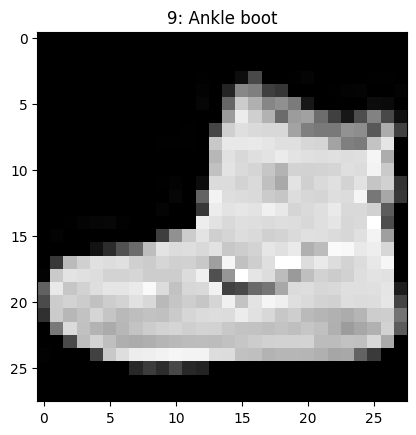

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(str(label) + ": " + train_data.classes[label]);

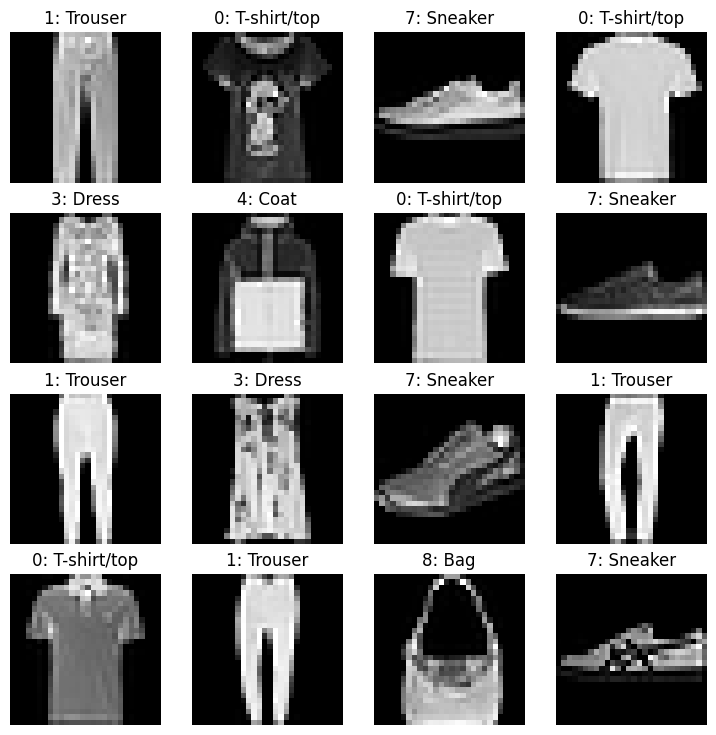

In [10]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(str(label) + ": " + train_data.classes[label])
    plt.axis(False)

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of a PyTorch Dataset.

DataLoader turns our Dataset into a Python iterable.

More specifically, we want to turn our data inot batches (or mini-batches)

Why would we do this?
1. It is more computationally efficient, as in, your computer hardware may not be able to look (in memory) at 60000 images at once. So we break it down to 32 images batches.
2. It gives our neural network more chances to update its gradients per epoch.


In [12]:
from torch.utils.data import DataLoader

# Setup batch size (hyperparameter)
BATCH_SIZE = 32

# Turn Datasets into iterable with DataLoader
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True) # shuffle data

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7de27b2cdba0>,
 <torch.utils.data.dataloader.DataLoader at 0x7de27b2ccc70>)

In [13]:
# Check what we've just created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7de27b2cdba0>, <torch.utils.data.dataloader.DataLoader object at 0x7de27b2ccc70>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [14]:
# Check what's inside the DataLoader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Random index: 6


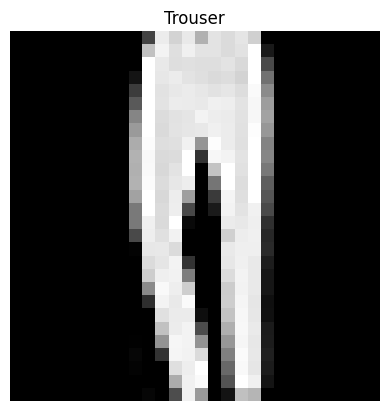

In [22]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
print(f"Random index: {random_idx}")
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_data.classes[label]);
plt.axis(False);

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling epxeriments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simple and add complexity when necessary

In [31]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [87]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural network layers become
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [88]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [89]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, # this is 28*28
                            hidden_units=10,
                            output_shape=len(train_data.classes)).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [90]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 3.1 Model 0: Setup loss function, optimizer and evaluation metrics

* Loss function - because this is a multi-class problem, we'll be using CrossEntropyLoss
* Optimizer - we'll be using SGD (Stochastic Gradient Descent)
* Evaluation metric - since this is a classification problem, let's use accuracy

In [91]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if (Path("helper_functions.py").is_file()):
    print("helper_functions.py already exists, skipping download")
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download


In [92]:
# Setup loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


### 3.2 Create a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll want to track are:
1. Model's performance (loss and accuracy values, etc)
1. How fast it runs

In [93]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [94]:
start_timer = timer()
# some code...
end_timer = timer()

print_train_time(start_timer, end_timer)

Train time on None: 0.000 seconds


4.919399998470908e-05

### 3.3  Create a training and test loop on batches of data

1. Loop through epochs
1. Loop through training batches, perform training steps, calculate train loss *per batch*
1. Loop through testing batches, perform testing steps, calculate test loss *per batch*
1. Print out what's happening
1. Time it all

**IMPORTANT**: The optimizer will update a model's parameters once per batch instead of once per epoch

In [95]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_model_0 = timer()

# Set the number of epochs (we'll keep this small for faster training time)

epochs = 3


# Create train/test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    ### Training
    train_loss = 0

    # Add a loop through the batches
    for batch, (X, y), in enumerate(train_dataloader):
        # 0. Send data to device
        X = X.to(device)
        y = y.to(device)

        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 0. Send data to device
            X = X.to(device)
            y = y.to(device)
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss and accuracy (accumulatively)
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate accuracy
            acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average
        acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {acc:.2f}%\n")

# Calculate training time
train_time_end_model_0 = timer()
total_train_time_model_0 = print_train_time(train_time_start_model_0, train_time_end_model_0, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cuda: 30.182 seconds


## 4. Make predictions and get Model 0 results